General Imports

In [112]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt



## NLP and Embedding Imports, word2vec download (faster locally)

In [30]:
import gensim.downloader as api
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
nltk.download('punkt')


wv = api.load('word2vec-google-news-300')



## NLP Functions (from Lecture Notes)

In [31]:
def find_cosine(vec1, vec2):  # Scale vectors to both have unit length
  unit_vec1 = vec1/np.linalg.norm(vec1)
  unit_vec2 = vec2/np.linalg.norm(vec2)
  # The dot product of unit vectors gives the cosine of their angle
  return np.dot(unit_vec1,unit_vec2)


def find_avg_vector(txt, embedding):
  words = word_tokenize(txt)
  vec_sum = None
  count = 0
  for word in words:
    if word in embedding:
      count += 1
      if vec_sum is not None:
        vec_sum += embedding[word]
      else:
        # The embeddings are read-only unless you copy them
        vec_sum = embedding[word].copy()
  if vec_sum is None:
    return pd.Series(np.zeros((300,)))  # Treat no word found in embedding as zero vector
  return pd.Series(vec_sum/count)

def more_like_snippet_A(snippet, snippetA, snippetB, embedding):
  snip_vec = find_avg_vector(snippet, embedding)
  snip_A = find_avg_vector(snippetA, embedding)
  snip_B = find_avg_vector(snippetB, embedding)
  return find_cosine(snip_vec, snip_A) > find_cosine(snip_vec, snip_B)


## Loading data and adding the attractiveness data

                 Attractive  star_rating  diff_index  student_star  \
professor_name                                                       
Aaron  Fogel              0         80.0        60.0          73.0   
Aaron  Kozbelt            0         94.0        64.0          93.0   
Aimee  Miller             0         72.0        64.0          67.5   
Alan  Cavaiola            0         86.0        56.0          85.5   
Alan  Kaminsky            0         58.0        78.0          50.0   
...                     ...          ...         ...           ...   
Brian  Rose               0         82.0        68.0          84.0   
Brian  Storey             3         11.1         7.5           9.0   
Britt  Leatham            0         60.0        54.0          45.5   
Bro. Joe  Burke           0         43.2        27.0          43.5   
Bruce  Arrigo             0         80.0        50.0          80.0   

                                                     tag_professor  \
professor_name     

C:\Users\cowan\AppData\Local\Temp\ipykernel_48824\2918900335.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_less_with_things_2['total_reviews'] = data_less_with_things_2.groupby('professor_name')['professor_name'].transform('count')
C:\Users\cowan\AppData\Local\Temp\ipykernel_48824\2918900335.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_less_with_things_2['Attractive'] = data_less_with_things_2.groupby('professor_name')['Attractive'].transform('mean')


<Axes: >

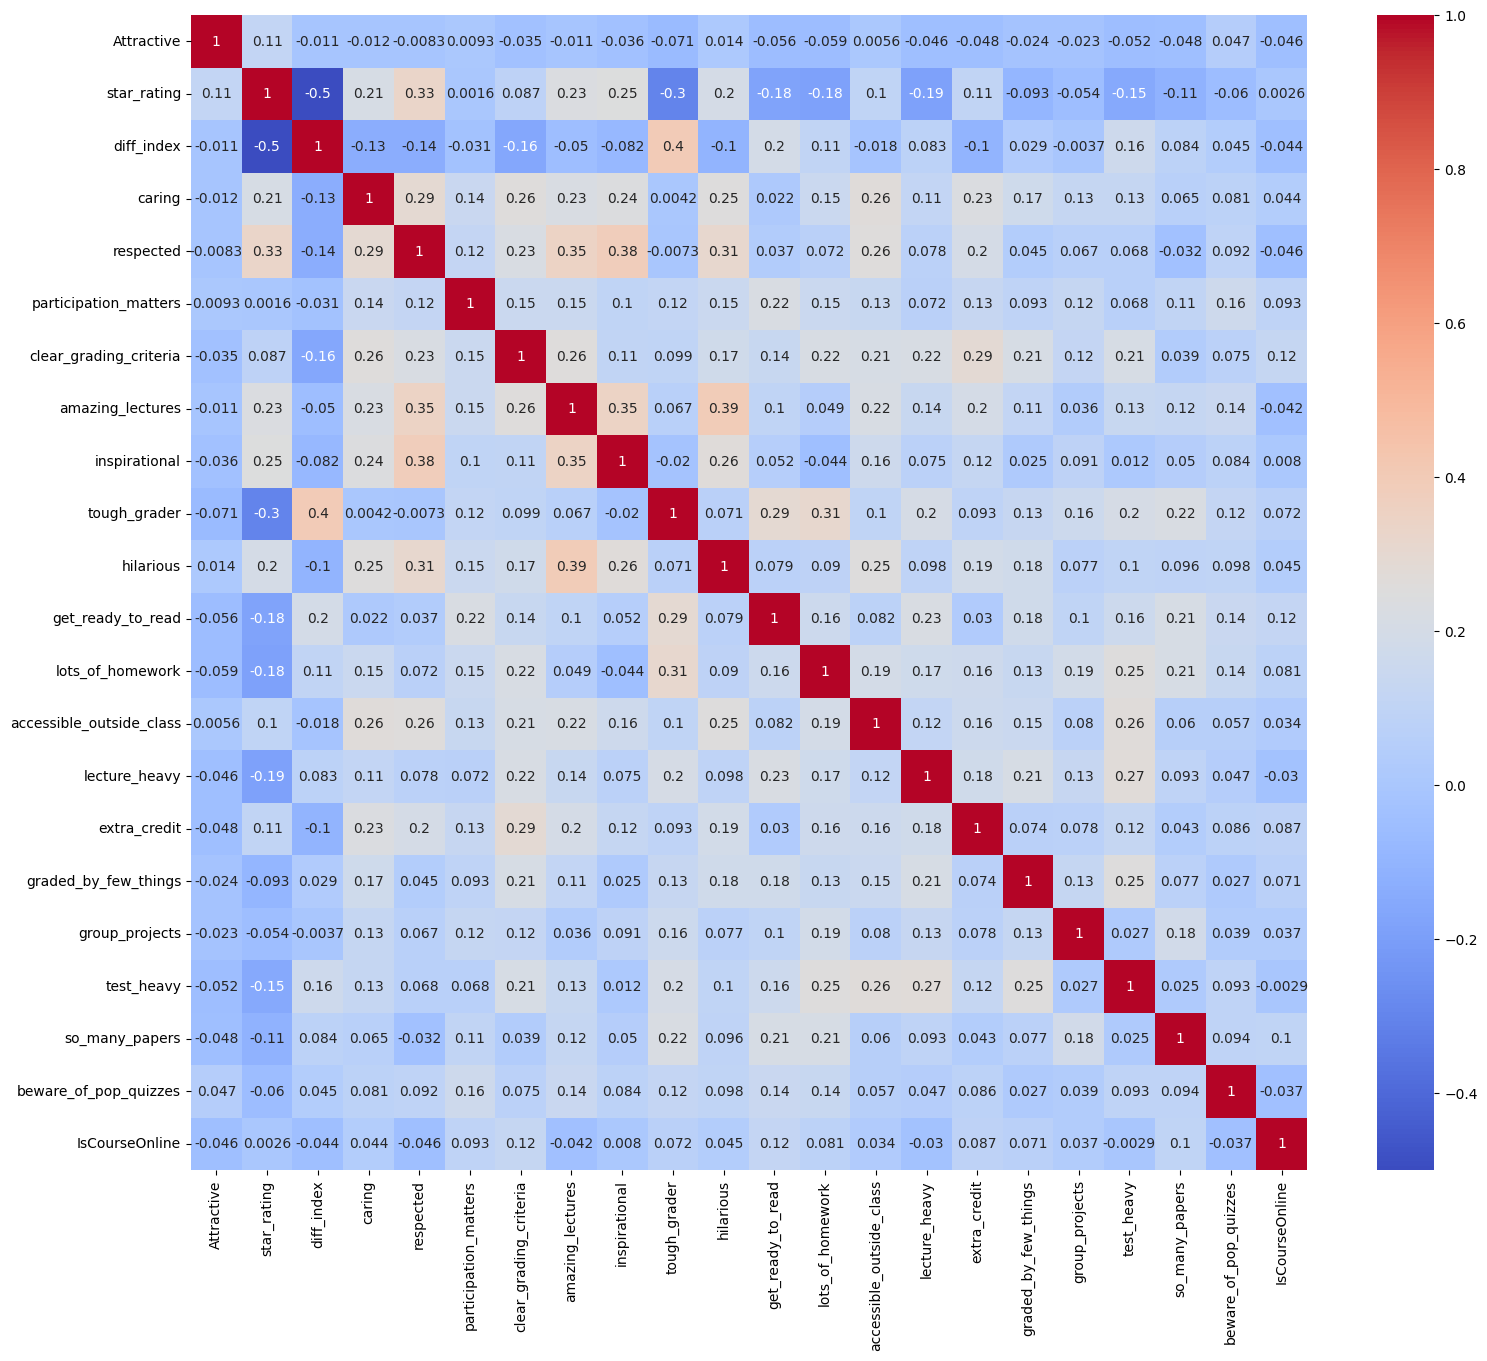

In [116]:
data = pd.read_csv('rmp2.csv') #loading in data
re_pattern = "cute|attractive| hot|handsome|good-looking|gorgeous|adorable|stunning|sexy|eye-candy|beautiful"
data['Attractive'] = 0 #initializing Attractive to zero all around
data.head()


## Uses regex to find the words in the comments column and then adds a 1 to the Attractive column if the word is found
for index, row in data.iterrows():
    reg = re.findall(re_pattern, str(row['comments']).lower())
    if len(reg) >= 1:
        #new_list.append(row['comments'])
        data.at[index, 'Attractive'] = 1
        
data_less = data[['professor_name', 'Attractive', 'star_rating', 'diff_index', 'student_star', 'tag_professor', 'gives_good_feedback', 'caring', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']]

data_less_with_things_3 = data_less[(data_less['Attractive'] == 1) | (data_less['caring'] == 1) | (data_less['gives_good_feedback'] == 1) | (data_less['respected'] == 1) | (data_less['participation_matters'] == 1) | (data_less['clear_grading_criteria'] == 1) | (data_less['skip_class'] == 1) | (data_less['amazing_lectures'] == 1) | (data_less['inspirational'] == 1) | (data_less['tough_grader'] == 1) | (data_less['hilarious'] == 1) | (data_less['get_ready_to_read'] == 1) | (data_less['lots_of_homework'] == 1) | (data_less['accessible_outside_class'] == 1) | (data_less['lecture_heavy'] == 1) | (data_less['extra_credit'] == 1) | (data_less['graded_by_few_things'] == 1) | (data_less['group_projects'] == 1) | (data_less['test_heavy'] == 1) | (data_less['so_many_papers'] == 1) | (data_less['beware_of_pop_quizzes'] == 1) | (data_less['IsCourseOnline'] == 1)]
data_less_with_things_2 = data_less[(data_less['tag_professor'].notna()) & (data_less['tag_professor'] != '')]

# count the number of total reviews for each professor
data_less_with_things_2['total_reviews'] = data_less_with_things_2.groupby('professor_name')['professor_name'].transform('count')
# Make the attraciveness column for every review the average attraciveness for that professor
data_less_with_things_2['Attractive'] = data_less_with_things_2.groupby('professor_name')['Attractive'].transform('mean')
professor_data = data_less_with_things_2.drop_duplicates(subset=['professor_name'], keep='first')
#tags_list is gives_good_feedback	caring	respected	participation_matters	clear_grading_criteria	skip_class	amazing_lectures	inspirational	tough_grader	hilarious	get_ready_to_read	lots_of_homework	accessible_outside_class	lecture_heavy	extra_credit	graded_by_few_things	group_projects	test_heavy	so_many_papers	beware_of_pop_quizzes	IsCourseOnline
tags_list = ['gives_good_feedback', 'caring', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']

print(data2.head(78))
#data2 to csv
professor_data.to_csv('professor_data.csv')
#data2.index
#print(data2.head(78))
#data2 = data.groupby('professor_name')
#data2[data2.index == 'Mary  Richardson']
plt.figure(figsize=(18, 15))
sns.heatmap(professor_data.drop(['professor_name', 'tag_professor', 'student_star', 'skip_class', 'gives_good_feedback', 'total_reviews'], axis=1).corr(), annot=True, cmap='coolwarm')


In [87]:
import re

text = """
Tough Grader (9)  Get ready to read (6)  GROUP PROJECTS (4)  TEST HEAVY (4)  Skip class? You won\'t pass. (3)  Participation matters (2)  LOTS OF HOMEWORK (2)  Amazing lectures (1)  ACCESSIBLE OUTSIDE CLASS (1)"""
# Define a dictionary to store the results
result_dict = {}

# Use a regular expression to find all key-value pairs
matches = re.findall(r'(.+?)\s*\((\d+)\)', text)

# Iterate through matches and populate the dictionary
for key, value in matches:
    result_dict[key.strip()] = int(value)

# Print the result
print(result_dict)

## Make a function for this
def get_tags(text):
    result_dict = {}
    matches = re.findall(r'(.+?)\s*\((\d+)\)', text)
    for key, value in matches:
        result_dict[key.strip()] = int(value)
    return result_dict
## standards: gives_good_feedback	caring	respected	participation_matters	clear_grading_criteria	skip_class	amazing_lectures	inspirational	tough_grader	hilarious	get_ready_to_read	lots_of_homework	accessible_outside_class	lecture_heavy	extra_credit	graded_by_few_things	group_projects	test_heavy	so_many_papers	beware_of_pop_quizzes	IsCourseOnline

convert_to_standard = {"LECTURE HEAVY": "lecture_heavy", "Gives good feedback": "gives_good_feecback", "Caring": "caring", "Respected": "respected", "Participation matters": "participation_matters", "Clear grading criteria": "clear_grading_criteria", "Skip class? You won't pass.": "skip_class", "Amazing lectures": "amazing_lectures", "Inspirational": "inspirational", "Tough Grader": "tough_grader", "Hilarious": "hilarious", "Get ready to read": "get_ready_to_read",
"LOTS OF HOMEWORK": "lots_of_homework", "ACCESSIBLE OUTSIDE CLASS": "accessible_outside_class", "EXTRA CREDIT": "extra_credit", "GRADED BY FEW THINGS": "graded_by_few_things", "GROUP PROJECTS": "group_projects", "TEST HEAVY": "test_heavy", "SO MANY PAPERS": "so_many_papers", "BEWARE OF POP QUIZZES": "beware_of_pop_quizzes", "IS COURSE ONLINE?": "IsCourseOnline"}

{'Tough Grader': 9, 'Get ready to read': 6, 'GROUP PROJECTS': 4, 'TEST HEAVY': 4, "Skip class? You won't pass.": 3, 'Participation matters': 2, 'LOTS OF HOMEWORK': 2, 'Amazing lectures': 1, 'ACCESSIBLE OUTSIDE CLASS': 1}


In [126]:
# Multiply attractiveness by 4
professor_data['Attractive'] = professor_data['Attractive']*4

# for each row in professor_data, get the tags and add them to the dataframe as columns, divided by total reviews
for index, row in professor_data.iterrows():
    #print(row['tag_professor'])
    tags = get_tags(row['tag_professor'])
    #print(tags)
    for key in tags.keys():
        if key in convert_to_standard:
            newkey = convert_to_standard[key]
            print(row['professor_name'], key, tags[key])
        professor_data.at[index, newkey] = min(1, float(tags[key])/float(row['total_reviews']))
professor_data.to_csv('professor_data.csv')


Leslie  Looney Hilarious 2
Leslie  Looney GROUP PROJECTS 2
Leslie  Looney Gives good feedback 1
Jans  Wager Gives good feedback 6
Jans  Wager Participation matters 3
Jans  Wager Respected 3
Jans  Wager Hilarious 3
Jans  Wager Caring 2
Jans  Wager GROUP PROJECTS 1
Jans  Wager Tough Grader 1
Jans  Wager GRADED BY FEW THINGS 1
Jans  Wager Amazing lectures 1
Jans  Wager Get ready to read 1
Jans  Wager Clear grading criteria 1
Bryan  Eldredge Tough Grader 2
Bryan  Eldredge Participation matters 2
Bryan  Eldredge LECTURE HEAVY 1
Bryan  Eldredge Inspirational 1
Bryan  Eldredge TEST HEAVY 1
Bryan  Eldredge Hilarious 1
William  Hollinrake Tough Grader 10
William  Hollinrake Get ready to read 1
Deborah  Pluss LECTURE HEAVY 3
Deborah  Pluss LOTS OF HOMEWORK 2
Deborah  Pluss Tough Grader 2
Deborah  Pluss Hilarious 1
Deborah  Pluss GROUP PROJECTS 1
Deborah  Pluss Get ready to read 1
Deborah  Pluss Caring 1
Candice  White Tough Grader 4
Candice  White BEWARE OF POP QUIZZES 4
Candice  White Gives goo

C:\Users\cowan\AppData\Local\Temp\ipykernel_48824\4091845146.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  professor_data.at[index, newkey] = min(1, float(tags[key])/float(row['total_reviews']))
C:\Users\cowan\AppData\Local\Temp\ipykernel_48824\4091845146.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.15' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  professor_data.at[index, newkey] = min(1, float(tags[key])/float(row['total_reviews']))
C:\Users\cowan\AppData\Local\Temp\ipykernel_48824\4091845146.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatibl

Richard  Bodek TEST HEAVY 1
Richard  Bodek Respected 1
Richard  Bodek SO MANY PAPERS 1
Richard  Bodek Inspirational 1
Richard  Bodek GRADED BY FEW THINGS 1
Craig  Wedderspoon Caring 2
Craig  Wedderspoon Respected 1
Craig  Wedderspoon Gives good feedback 1
Emily  Blanck Tough Grader 3
Emily  Blanck Gives good feedback 2
Emily  Blanck LOTS OF HOMEWORK 2
Emily  Blanck Get ready to read 2
Emily  Blanck LECTURE HEAVY 2
Emily  Blanck Participation matters 1
Emily  Blanck Caring 1
Emily  Blanck GROUP PROJECTS 1
Emily  Blanck SO MANY PAPERS 1
Philip  Rothschild Tough Grader 3
Philip  Rothschild GROUP PROJECTS 2
Philip  Rothschild GRADED BY FEW THINGS 1
Philip  Rothschild Caring 1
Rebecca  Comay Amazing lectures 2
Rebecca  Comay Get ready to read 1
Rebecca  Comay Inspirational 1
Andy  Katz Tough Grader 1
Andy  Katz Participation matters 1
Laurie  Iten Tough Grader 6
Laurie  Iten Get ready to read 6
Laurie  Iten BEWARE OF POP QUIZZES 3
Laurie  Iten Clear grading criteria 1
Laurie  Iten Participa

## Attractiveness metric testing
#### Iterates through every line and grades comments on attractivness on either regex or NLP

In [7]:
maxx = 0
yes_count = 0
no_count = 0
re_pattern = "cute|attractive| hot|handsome|good-looking|gorgeous|adorable|stunning|sexy|eye-candy|beautiful"
sentence = "sexy cute hot handsome attractive"
sentence2 = "An awesome teacher, being cute, attractive, hot, handsome, good-looking, gorgeous, adorable, stunning, sexy, eye-candy, beautiful, and pretty."
sentence3 = "super nice, easy, and helful, and an awesome teacher, or very boring, unhelpful, and bad"
sentence4 = "His wife is a lucky woman"
sentence5 = "He is a great professor"
new_list = []
attractiveness_x = []
rating_y = []

for index, row in data.iterrows():
    #print(row['comments'])
    #print(find_cosine(find_avg_vector(row['comments'], wv), find_avg_vector("This professor is attractive",wv)))
    comment = str(row['comments']).lower()
    comment = ' '.join(get_adjectives(comment))
    #print(comment)
    comment_cos = find_cosine(find_avg_vector(comment, wv), find_avg_vector(sentence,wv))
    attractiveness_x.append(comment_cos)
    rating_y.append(row['star_rating'])
    #comment_cos = find_cosine(find_avg_vector(str(row['comments']).lower(), wv), find_avg_vector(sentence4.lower(),wv))
    #comment_cos2 = find_cosine(find_avg_vector(str(row['comments']).lower(), wv), find_avg_vector(sentence5.lower(),wv))
    #comment_cos3 = find_cosine(find_avg_vector(str(row['comments']).lower(), wv), find_avg_vector("participation matters",wv))
    if comment_cos > 0.65:
        print(comment_cos)
        #print(comment)
        print(row['comments'])
        print(row['professor_name'])
        print("")
        #print("")
#     if comment_cos < comment_cos2 and comment_cos > 0.52:
#         #maxx = find_cosine(find_avg_vector(str(row['comments']), wv), find_avg_vector(sentence,wv))
#         #new_list.append(row['comments'])
#         #print the count for how many times the words show up in rgeex
        reg = re.findall(re_pattern, str(row['comments']).lower())
        if len(reg) > 0:
            print(reg)
            yes_count += 1
# #             new_list.append(row['comments'])
#               print(comment_cos)
#               print(comment)
#               print(row['comments'])
#               print(reg)
#             print(comment_cos2)
#             print(row['comments'])
#             print(row['professor_name'])
#             print(reg)
#             print("")
            
        else:
            no_count += 1
print(f'yes count: {yes_count}')
print(f'no count: {no_count}')
print(f'percentage: {yes_count/(yes_count + no_count)}')
        
plt.scatter(attractiveness_x, rating_y)


NameError: name 'get_adjectives' is not defined

In [9]:
plt.scatter(attractiveness_x, rating_y)
model2 = LinearRegression()
# print is attractiveness_x contaisn any NaNs
print(np.isnan(attractiveness_x).any())
#print where they are
#drop nans from both
attractiveness_x = np.array(attractiveness_x)
rating_y = np.array(rating_y)
attractiveness_x = attractiveness_x[~np.isnan(attractiveness_x)]
rating_y = rating_y[~np.isnan(rating_y)]
model2.fit(attractiveness_x.reshape(-1,1), rating_y.reshape(-1,1))

NameError: name 'plt' is not defined

## Random Forest Classification (and framework for others)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV as RSCV



# x = data_less[['Attractive', 'caring', 'gives_good_feedback', 'respected', 'participation_matters', 'clear_grading_criteria', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'test_heavy', 'so_many_papers']]
# y = data_less['star_rating']


# This gets rid of all rows where the user did not enter a single 1 in the boolean tags
data_less_with_things_2 = data_less[(data_less['Attractive'] == 1) | (data_less['caring'] == 1) | (data_less['gives_good_feedback'] == 1) | (data_less['respected'] == 1) | (data_less['participation_matters'] == 1) | (data_less['clear_grading_criteria'] == 1) | (data_less['skip_class'] == 1) | (data_less['amazing_lectures'] == 1) | (data_less['inspirational'] == 1) | (data_less['tough_grader'] == 1) | (data_less['hilarious'] == 1) | (data_less['get_ready_to_read'] == 1) | (data_less['lots_of_homework'] == 1) | (data_less['accessible_outside_class'] == 1) | (data_less['lecture_heavy'] == 1) | (data_less['extra_credit'] == 1) | (data_less['graded_by_few_things'] == 1) | (data_less['group_projects'] == 1) | (data_less['test_heavy'] == 1) | (data_less['so_many_papers'] == 1) | (data_less['beware_of_pop_quizzes'] == 1) | (data_less['IsCourseOnline'] == 1)]
y_wit_things = data_less_with_things_2['star_rating']
x_wit_things = data_less_with_things_2[['Attractive', 'caring', 'gives_good_feedback', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']]
x_wit_less_things = x_wit_things[['Attractive','respected', 'inspirational', 'tough_grader']]
y_classifications = y_wit_things.apply(lambda x: 1 if x >= 3.7 else 0)



x_train, x_test, y_train, y_test = \
    train_test_split(x_wit_things, y_classifications, test_size=0.15)
# model = LinearRegression()

# x_train, x_test, y_train, y_test = \
#     train_test_split(x_wit_things, y_classifications, test_size=0.15)

#model = RandomForestClassifier(max_depth=8, n_estimators=200)


param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(x_train, y_train)
model = model.best_estimator_
params = model.get_params()
print(params)

#print(x_train.head(5))
#model.fit(x_train,y_train)
# y_hat = model.predict(x_test)
# for i in range(len(y_hat)):
#   # print predicted - actual
#   if abs(y_hat[i] - y_test.values[i]) > 1.5:
#     # print predicted and actyal
#     print(f'predicted: {y_hat[i]} actual: {y_test.values[i]}')

    # print(x_test.iloc[i])
#plt.plot(x,y,'o')
#plt.plot(x_test[:50],y_hat[:50],'o')
#print(model.score(x,y))
print(cross_val_score(model, x_train, y_train))
print(model.score(x_test, y_test))
#print coefficient and intercept
# Now make a prediction for the line where professor_name = 'Mary  Richardson'
# d2 = data2[data2.index == 'Mary  Richardson']
# x2 = d2[['Attractive', 'caring', 'gives_good_feedback', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']]
# y2 = d2['star_rating']

# #plt.figure(figsize=(120, 80))
#plot_tree(model, filled=True, feature_names=x.columns, rounded=True, fontsize=7)
#plt.show()
#print coefficients
#print(model.coef_)
#print(model.intercept_)
print(model.feature_importances_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.7000000000000001, 'max_leaf_nodes': None, 'max_samples': 0.5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 110, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
[0.79416363 0.81448671 0.80719125 0.79937467 0.81657113]
0.79456906729634
[4.15150059e-05 4.18893229e-02 4.20707829e-02 1.82860685e-01
 1.66144607e-02 3.76323188e-02 1.68339707e-02 1.03350244e-01
 3.63191899e-02 1.76623694e-01 3.34997916e-02 4.76061685e-02
 4.45465293e-02 3.82734693e-02 4.96632491e-02 1.51454741e-02
 1.06858247e-02 9.53769107e-03 5.44948539e-02 1.05050506e-02
 3.05532068e-02 1.25250657e-03]


In [138]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

x = professor_data[['Attractive', 'caring', 'respected', 'participation_matters', 'clear_grading_criteria', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']]
y = professor_data['star_rating']


x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.15)
#model = LinearRegression()


regr = ElasticNet(random_state=0)
regr.fit(x_train, y_train)
# print(regr.coef_)
# print(regr.intercept_)
# count the number of 1s in x['respected']


#from sklearn.linear_model import ElasticNet
#import numpy as np

# Create a hyperparameter grid
param_grid = {
    'alpha': np.logspace(-4, 4, 9),  # alpha values from 0.0001 to 10000
    'l1_ratio': np.linspace(0, 1, 100)  # l1_ratio values from 0 to 1S
}

model = RSCV(ElasticNet(), param_grid, n_iter = 15).fit(x_train, y_train)
model = model.best_estimator_
params = model.get_params()
print(params)
print(model.coef_)
print(model.intercept_)
print(len(x_train))
print(len(x_test))
# cross val score
print(cross_val_score(model, x_train, y_train))
#print(y_test[0])
for i in range(len(x_test)):
    print(i)
    print(x_test.iloc[i])
    #print(y_test[:10])
    print(model.predict(x_test[i]))


{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.11111111111111112, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
[ 0.30763055  0.42848527  0.74405199  0.02177427  0.28421581  0.38308082
  0.51854508 -0.81794762  0.31701019 -0.30645995 -0.37871886  0.01562119
 -0.44489168  0.06628904 -0.         -0.         -0.06148816 -0.
  0.         -0.00889622]
3.7227192396365907
532
94
[0.14941793 0.23692162 0.19645161 0.21031755 0.16505943]
0
Attractive                  0.00
caring                      0.00
respected                   0.00
participation_matters       0.05
clear_grading_criteria      0.00
amazing_lectures            0.00
inspirational               0.00
tough_grader                0.00
hilarious                   0.00
get_ready_to_read           0.00
lots_of_homework            0.00
accessible_outside_class    0.00
lecture_heavy               0.00
extra_credit          

KeyError: 0

In [137]:
import scipy
# create an array with star_rating of people rated as attracive

x = ['Attractive', 'caring', 'gives_good_feedback', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']
features_dict = {}
p_val_dict = {}
for i in x:
    #print(features_dict)
    features_dict[i] = []
    features_dict['Not ' + i] = []
    for index, row in professor_data.iterrows():
        if row[i] > 0:
            features_dict[i].append(row['star_rating'])
        else:
            features_dict['Not ' + i].append(row['star_rating'])

for i in features_dict.keys():
    print(i)
    if len(features_dict[i]) == 0:
        print("\n")
        continue
    print(sum(features_dict[i])/len(features_dict[i]))
    print(len(features_dict[i]))
    if i[:3] == 'Not':
        pass
    else:
        _, p = scipy.stats.ttest_ind(features_dict['Not ' + i], features_dict[i])
    print(f'{p}\n')
    p_val_dict[i] = []
    p_val_dict[i].append(p)
    p_val_dict[i].append(sum(features_dict[i])/len(features_dict[i]))

attractive = []
not_attractive = []


#seaborn bar graph with Attractive vs not attractive and p values as y, 
#sns.barplot(x=['Attractive', 'Not Attractive'], y=[p_val_dict['Attractive'][1], p_val_dict['Not Attractive'][1]])
#The same plot with data labels
ax = sns.barplot(x=['Attractive', 'Not Attractive'], y=[p_val_dict['Attractive'][1], p_val_dict['Not Attractive'][1]])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                weight='bold', color='black')  # Set weight to bold and text color to black

# Show the plot
plt.show()
#ax
# for index, row in data2.iterrows():
#     if row['Attractive'] > 0:
#         attractive.append(row['star_rating'])
#     else:
#         not_attractive.append(row['star_rating'])
# print(len(attractive))
# print(len(not_attractive[:len(attractive)]))
# print(sum(attractive)/len(attractive))
# print(sum(not_attractive)/len(not_attractive))
# _, p = scipy.stats.ttest_ind(attractive[:len(attractive)], not_attractive)
# p

Attractive
4.012048192771085
83
0.0006054397489588208

Not Attractive
3.7068139963167566
543
0.0006054397489588208

caring
3.9063973063973036
297
4.768920664623947e-07

Not caring
3.6036474164133727
329
4.768920664623947e-07

gives_good_feedback
3.892145015105738
331
3.178771772082053e-07

Not gives_good_feedback
3.584745762711863
295
3.178771772082053e-07

respected
4.000324675324673
308
2.987283476756711e-17

Not respected
3.5022012578616346
318
2.987283476756711e-17

participation_matters
3.745724907063195
269
0.9643998123910218

Not participation_matters
3.748459383753497
357
0.9643998123910218

clear_grading_criteria
3.8326271186440652
236
0.028294683579308356

Not clear_grading_criteria
3.6956410256410197
390
0.028294683579308356

skip_class
3.6484745762711848
295
0.0020187735053216935

Not skip_class
3.835347432024167
331
0.0020187735053216935

amazing_lectures
3.985844748858445
219
4.937819689192559e-09

Not amazing_lectures
3.618918918918915
407
4.937819689192559e-09

inspirat

<Axes: >

In [29]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
print(data2)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def get_adjectives(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)

    # Filter words based on their part-of-speech tags (adjectives)
    adjectives = [word for word, tag in tagged_words if tag.startswith('JJ')]

    return adjectives

# Example usage
for i in data['comments']:
    print(get_adjectives(i))
    print("")
#djectives = get_adjectives(sentence)
#print("Adjectives:", adjectives)

                   Attractive  star_rating  diff_index  gives_good_feedback  \
professor_name                                                                
A  Osaitile              0.00          3.7         2.7                  0.0   
A  Ruttenbur             0.00          3.4         1.4                  0.0   
A J  Senchack            0.00          3.2         3.2                  0.0   
Aaron  Fogel             0.00          4.0         3.0                  0.0   
Aaron  Kozbelt           0.00          4.7         3.2                  1.0   
...                       ...          ...         ...                  ...   
Ying  Wang               0.05          4.9         2.5                  0.0   
Younghe  Kim Park        0.00          4.0         2.8                  0.0   
Yousif  Shamoo           0.00          3.9         4.0                  0.0   
Zeno  Swijtink           0.00          1.6         3.5                  0.0   
Zeynep  Tenger           0.00          3.5         2

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cowan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cowan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['great', 'fantastic']

['nice', 'super', 'easy']

['easiest', 'Easiest', 'Obama-like']

['awesome']

['nice', 'willing', 'pleasant']

['easy', 'due', 'easy', 'final']

['fair', 'prof.The', 'easy', 'interesting.No', 'weekly', 'few', 'great', 'sweet']

['nice', 'total', 'pretty', 'easy', 'final', 'midterm']

['nice', 'in-class', 'most', 'boring', 'common', 'broad', 'much']

[]

['short', 'easy', 'tough']

['easy']

['nice', 'fair', 'sure', 'oral', 'easygoing', 'hard']



TypeError: expected string or bytes-like object, got 'float'

In [38]:
sentence = "cute attractive hot handsome good-looking gorgeous adorable stunning sexy eye-candy beautiful pretty charming nice sweet old young sassy"
for i in sentence.split():
    if i in wv:
        print(i, wv.similarity(i, 'sexy'))
#print(wv.similarity('sexy', 'handsome'))

cute 0.6336135
attractive 0.4036638
hot 0.3644036
handsome 0.4585149
gorgeous 0.595917
adorable 0.46982086
stunning 0.2523803
sexy 1.0
beautiful 0.46370074
pretty 0.3007432
charming 0.46031648
nice 0.32007414
sweet 0.43021178
old 0.13181771
young 0.2800097


In [10]:
! pip install gensim
! pip install pandas
! pip install nltk
! pip install seaborn
! pip install matplotlib

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 660.6 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.5 MB 919.0 kB/s eta 0:00:02
     -------------------- ------------------- 0.8/1.5 MB 6.2 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.6 kB ? eta -:--:--
   --------------------------------------- 269.6/269.6 kB 17.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   --------------